In [5]:
import altair as alt
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


In [7]:
os.getcwd()

'C:\\Users\\mohit'

In [9]:
wc = pd.read_csv('C:\\Users\mohit\Downloads\world.csv')

In [11]:
wc.head()

,date,confirmed,recovered,death
0,1/22/2020,0,0,0
1,1/23/2020,0,0,0
2,1/24/2020,0,0,0
3,1/25/2020,1,0,0
4,1/26/2020,1,0,0


Here I covert the date from string to date format, and then use lamda function to map the difference and then add a column days

In [12]:
wc['days']= wc['date'].map(lambda x : (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime("1/22/2020", '%m/%d/%Y')).days  )
wc[['date','days','confirmed']]

,date,days,confirmed
0,1/22/2020,0,0
1,1/23/2020,1,0
2,1/24/2020,2,0
3,1/25/2020,3,1
4,1/26/2020,4,1
...,...,...,...
85,4/16/2020,85,16
86,4/17/2020,86,30
87,4/18/2020,87,30
88,4/19/2020,88,30


The Gompertz curve or Gompertz function, is a type of mathematical model for a time series and is named after Benjamin Gompertz (1779-1865). It is a sigmoid function which describes growth as being slowest at the start and end of a given time period. The right-hand or future value asymptote of the function is approached much more gradually by the curve than the left-hand or lower valued asymptote. This is in contrast to the simple logistic function in which both asymptotes are approached by the curve symmetrically. It is a special case of the generalised logistic function. The function was originally designed to describe human mortality, but since has been modified to be applied in biology, with regard to detailing populations. 

In [24]:
def gompertz(a, c, t, t_0):
    Q = a * np.exp(-np.exp(-c*(t-t_0)))
    return Q

x = list(wc['days'])
y = list(wc['confirmed'])


x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.85, test_size=0.15, shuffle=False)

x_test_added = x_test + list(range((max(x_test)+1), 140))

popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([5, 0, 0],[14*max(y_train),0.15, 160]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train+x_test_added, estimated_t_0)

y_pred

array([4.06763940e-174, 1.85858372e-161, 1.03339399e-149, 8.14124690e-139,
       1.04659400e-128, 2.50275390e-119, 1.25715907e-110, 1.48477419e-102,
       4.57779652e-095, 4.05997924e-088, 1.13334588e-081, 1.08254835e-075,
       3.82324429e-070, 5.36461748e-065, 3.19693264e-060, 8.60774294e-056,
       1.10901515e-051, 7.21120620e-048, 2.48633231e-044, 4.75882038e-041,
       5.27591633e-038, 3.52443865e-035, 1.47154106e-032, 3.97277015e-030,
       7.15707734e-028, 8.85917203e-026, 7.74180860e-024, 4.89789383e-022,
       2.29630865e-020, 8.15284172e-019, 2.23650577e-017, 4.82955714e-016,
       8.35276059e-015, 1.17572236e-013, 1.36708256e-012, 1.33136187e-011,
       1.09994717e-010, 7.80158499e-010, 4.80305128e-009, 2.59308679e-008,
       1.23937705e-007, 5.29053695e-007, 2.03354151e-006, 7.09176112e-006,
       2.25972671e-005, 6.62202637e-005, 1.79550574e-004, 4.52982543e-004,
       1.06889889e-003, 2.37055792e-003, 4.96329376e-003, 9.85146622e-003,
       1.86088172e-002, 3

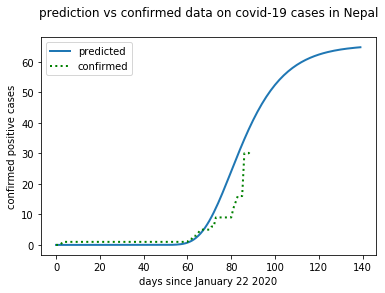

In [25]:
plt.plot(x_train+x_test_added, y_pred, linewidth=2, label='predicted') 
plt.plot(x, y, linewidth=2, color='g', linestyle='dotted', label='confirmed')
plt.title('prediction vs confirmed data on covid-19 cases in Nepal\n')
plt.xlabel('days since January 22 2020')
plt.ylabel('confirmed positive cases')
plt.legend(loc='upper left') 


 We see that this model seems to be close to the actual data and predicts the cases to reach at 65 .